<a href="https://colab.research.google.com/github/Paramjeet03/Car_gauge_detection/blob/main/Car_gauge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import json
import os
import numpy as np


class CocoDataset(Dataset):
    def __init__(self, img_dir, ann_file, transforms=None):
        self.img_dir = img_dir
        self.transforms = transforms

        with open(ann_file, "r") as f:
            coco = json.load(f)

        self.images = coco["images"]
        self.annotations = coco["annotations"]

        # group annotations by image_id
        self.ann_by_img = {}
        for ann in self.annotations:
            img_id = ann["image_id"]
            if img_id not in self.ann_by_img:
                self.ann_by_img[img_id] = []
            self.ann_by_img[img_id].append(ann)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_info = self.images[idx]
        img_path = os.path.join(self.img_dir, img_info["file_name"])

        # Load image
        img = Image.open(img_path).convert("RGB")
        img = np.array(img)

        img_id = img_info["id"]
        anns = self.ann_by_img.get(img_id, [])

        boxes = []
        labels = []

        for ann in anns:
            x, y, w, h = ann["bbox"]
            boxes.append([x, y, x + w, y + h])  # convert to xmin,xmax,x2,y2
            labels.append(ann["category_id"])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels,
        }

        img = torch.as_tensor(img, dtype=torch.float32).permute(2, 0, 1) / 255.0

        return img, target


DEVICE: cuda
GPU Name: Tesla T4
Training Started...

Epoch 1/15


Training: 100%|██████████| 25/25 [00:06<00:00,  4.03batch/s, loss=0.2132]


Epoch 1/15 - Avg Loss: 0.3420 - Val IoU: 0.1213
Best model saved!

Epoch 2/15


Training: 100%|██████████| 25/25 [00:06<00:00,  4.00batch/s, loss=0.4112]


Epoch 2/15 - Avg Loss: 0.2141 - Val IoU: 0.1017

Epoch 3/15


Training: 100%|██████████| 25/25 [00:06<00:00,  3.99batch/s, loss=0.2974]


Epoch 3/15 - Avg Loss: 0.1912 - Val IoU: 0.1067

Epoch 4/15


Training: 100%|██████████| 25/25 [00:06<00:00,  3.71batch/s, loss=0.0811]


Epoch 4/15 - Avg Loss: 0.1738 - Val IoU: 0.1331
Best model saved!

Epoch 5/15


Training: 100%|██████████| 25/25 [00:06<00:00,  3.74batch/s, loss=0.1260]


Epoch 5/15 - Avg Loss: 0.1410 - Val IoU: 0.1356
Best model saved!

Epoch 6/15


Training: 100%|██████████| 25/25 [00:06<00:00,  3.84batch/s, loss=0.1220]


Epoch 6/15 - Avg Loss: 0.1079 - Val IoU: 0.2778
Best model saved!

Epoch 7/15


Training: 100%|██████████| 25/25 [00:06<00:00,  4.04batch/s, loss=0.0713]


Epoch 7/15 - Avg Loss: 0.0781 - Val IoU: 0.3042
Best model saved!

Epoch 8/15


Training: 100%|██████████| 25/25 [00:06<00:00,  4.03batch/s, loss=0.0470]


Epoch 8/15 - Avg Loss: 0.0670 - Val IoU: 0.2826

Epoch 9/15


Training: 100%|██████████| 25/25 [00:10<00:00,  2.48batch/s, loss=0.0836]


Epoch 9/15 - Avg Loss: 0.0584 - Val IoU: 0.2697

Epoch 10/15


Training: 100%|██████████| 25/25 [00:07<00:00,  3.20batch/s, loss=0.0382]


Epoch 10/15 - Avg Loss: 0.0543 - Val IoU: 0.2862

Epoch 11/15


Training: 100%|██████████| 25/25 [00:06<00:00,  4.00batch/s, loss=0.0315]


Epoch 11/15 - Avg Loss: 0.0452 - Val IoU: 0.2801

Epoch 12/15


Training: 100%|██████████| 25/25 [00:06<00:00,  4.10batch/s, loss=0.0263]


Epoch 12/15 - Avg Loss: 0.0427 - Val IoU: 0.2945

Epoch 13/15


Training: 100%|██████████| 25/25 [00:06<00:00,  3.99batch/s, loss=0.0274]


Epoch 13/15 - Avg Loss: 0.0416 - Val IoU: 0.2995

Epoch 14/15


Training: 100%|██████████| 25/25 [00:06<00:00,  4.08batch/s, loss=0.0316]


Epoch 14/15 - Avg Loss: 0.0410 - Val IoU: 0.3044
Best model saved!

Epoch 15/15


Training: 100%|██████████| 25/25 [00:06<00:00,  3.99batch/s, loss=0.0514]


Epoch 15/15 - Avg Loss: 0.0418 - Val IoU: 0.3047
Best model saved!

Training completed successfully!


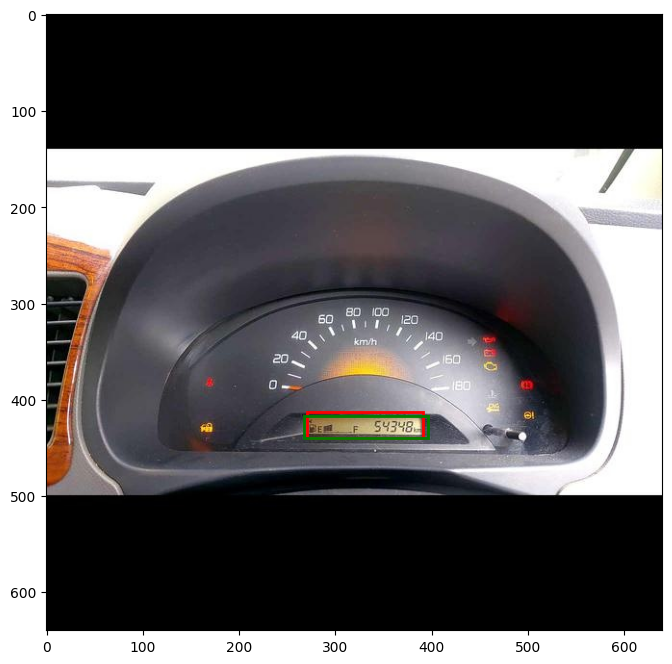

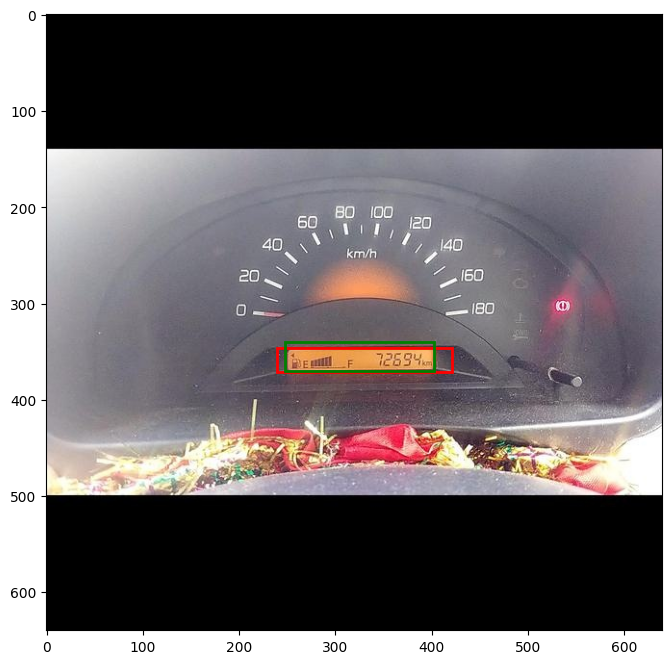

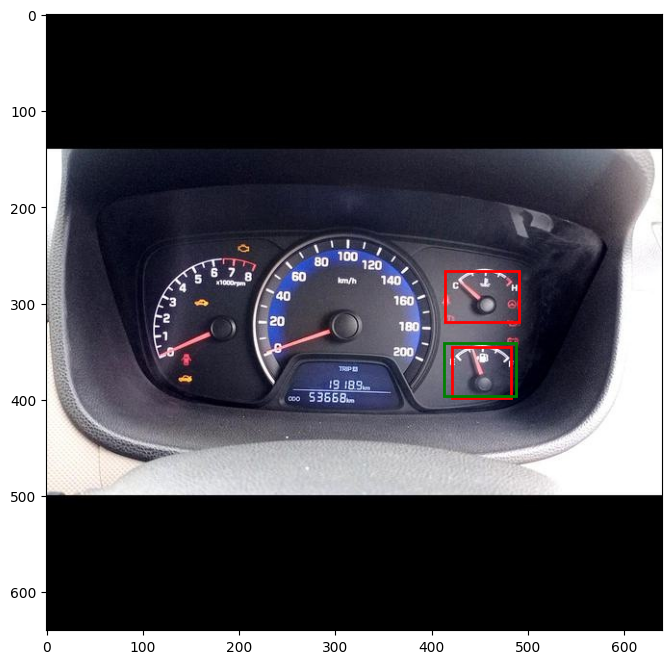

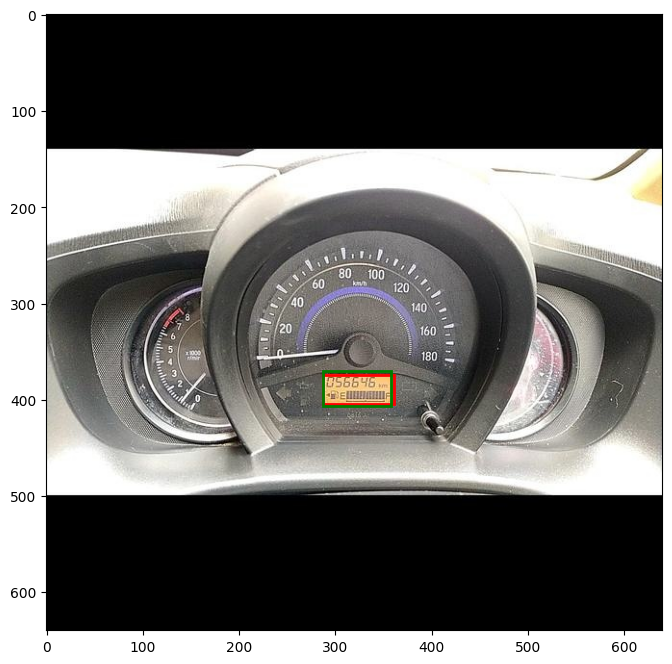

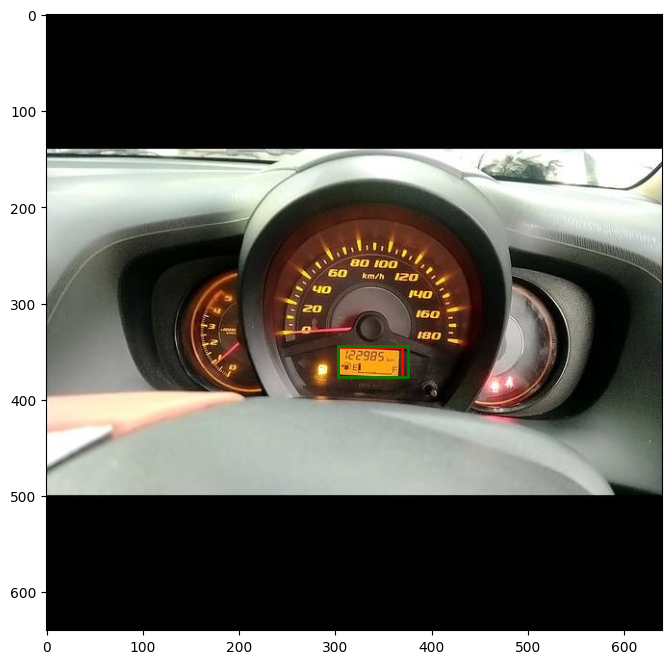

In [ ]:
import os
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision.transforms as T
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ================== CONFIG =======================
train_images = "/content/drive/MyDrive/Main/Main/Train_2"
train_ann = "/content/drive/MyDrive/Main/Main/train_coco.json"

val_images = "/content/drive/MyDrive/Main/Main/val"
val_ann = "/content/drive/MyDrive/Main/Main/val_coco.json"

num_classes = 4   # 3 classes + background
epochs = 15
batch_size = 2
lr = 0.0003
save_dir = "/content/drive/MyDrive/Main/Main"  # Directory to save models
# ==================================================

# ========== GPU CHECK ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("DEVICE:", device)
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("No GPU Found")

# ====== TRANSFORMS ======
def get_transform(train=True):
    transforms = [T.ToTensor()]
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

# ====== DATASETS ======
train_dataset = CocoDataset(train_images, train_ann, transforms=get_transform(train=True))
val_dataset = CocoDataset(val_images, val_ann, transforms=get_transform(train=False))

def collate_fn(batch):
    return tuple(zip(*batch))

train_loader = DataLoader(train_dataset, batch_size=batch_size,
                          shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=1,
                        shuffle=False, collate_fn=collate_fn)

# ========= LOAD MODEL ==========
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")

# Replace classifier head for your dataset classes
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(
    in_features, num_classes
)

model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Mixed precision
scaler = torch.amp.GradScaler(device="cuda" if torch.cuda.is_available() else "cpu")

# ====== CREATE SAVE DIRECTORY ======
os.makedirs(save_dir, exist_ok=True)

# ====== UTILITY: IoU COMPUTATION ======
def compute_iou(box1, box2):
    # box = [x1, y1, x2, y2]
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter_area = max(0, xB - xA) * max(0, yB - yA)
    box1_area = (box1[2]-box1[0])*(box1[3]-box1[1])
    box2_area = (box2[2]-box2[0])*(box2[3]-box2[1])
    iou = inter_area / float(box1_area + box2_area - inter_area + 1e-6)
    return iou

def validate(model, val_loader, device):
    model.eval()
    iou_scores = []
    with torch.no_grad():
        for imgs, targets in val_loader:
            imgs = [img.to(device) for img in imgs]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            outputs = model(imgs)

            for out, tgt in zip(outputs, targets):
                pred_boxes = out['boxes'].cpu()
                true_boxes = tgt['boxes'].cpu()
                for pb in pred_boxes:
                    ious = [compute_iou(pb, tb) for tb in true_boxes]
                    if ious:
                        iou_scores.append(max(ious))
    if len(iou_scores) == 0:
        return 0.0
    return sum(iou_scores)/len(iou_scores)

# ====== TRAINING LOOP WITH VALIDATION ======
best_iou = 0.0
print("Training Started...")

for epoch in range(epochs):
    model.train()
    total_loss = 0
    print(f"\nEpoch {epoch+1}/{epochs}")

    progress = tqdm(train_loader, desc="Training", unit="batch")

    for imgs, targets in progress:
        imgs = [img.to(device) for img in imgs]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()

        with torch.amp.autocast(device_type="cuda" if torch.cuda.is_available() else "cpu"):
            loss_dict = model(imgs, targets)
            loss = sum(loss_dict.values())

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()
        progress.set_postfix(loss=f"{loss.item():.4f}")

    lr_scheduler.step()

    avg_loss = total_loss / len(train_loader)
    val_iou = validate(model, val_loader, device)
    print(f"Epoch {epoch+1}/{epochs} - Avg Loss: {avg_loss:.4f} - Val IoU: {val_iou:.4f}")

    # Save best model
    if val_iou > best_iou:
        best_iou = val_iou
        torch.save(model.state_dict(), os.path.join(save_dir, "best_model.pth"))
        print("Best model saved!")

    torch.cuda.empty_cache()

print("\nTraining completed successfully!")

# ====== VISUALIZATION ON VALIDATION SET ======
def visualize_predictions(model, dataset, device, num_images=5, score_thresh=0.5):
    model.eval()
    for i in range(min(num_images, len(dataset))):
        img, target = dataset[i]
        with torch.no_grad():
            output = model([img.to(device)])[0]

        # Convert tensor to numpy
        img_np = img.permute(1,2,0).cpu().numpy()
        fig, ax = plt.subplots(1, figsize=(8,8))
        ax.imshow(img_np)

        # Draw predicted boxes
        for box, score in zip(output['boxes'].cpu(), output['scores'].cpu()):
            if score > score_thresh:
                x1, y1, x2, y2 = box
                rect = patches.Rectangle((x1, y1), x2-x1, y2-y1,
                                         linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
        # Draw ground truth boxes
        for box in target['boxes']:
            x1, y1, x2, y2 = box
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1,
                                     linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)

        plt.show()

# Load best model for visualization
model.load_state_dict(torch.load(os.path.join(save_dir, "best_model.pth")))
visualize_predictions(model, val_dataset, device, num_images=5)


In [ ]:
import os
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import gc

# CONFIG
model_path = r"/content/drive/MyDrive/Main/Main/best_model.pth"
images_folder = r"/content/drive/MyDrive/Main/Main/val"
output_folder = r"/content/drive/MyDrive/Main/Main/Output"
num_classes = 4
score_threshold = 0.5
num_samples = 10
max_size = 512  # Resize images

os.makedirs(output_folder, exist_ok=True)

# TRANSFORM
transform = T.Compose([T.ToTensor()])

# LOAD MODEL
device = torch.device("cpu")  # CPU only for stability
model = fasterrcnn_resnet50_fpn(weights=None)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(
    in_features, num_classes
)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()
print("Model loaded successfully on CPU.")

# HELPER FUNCTION
def predict_and_save(image_path, save_path):
    img = Image.open(image_path).convert("RGB")
    img.thumbnail((max_size, max_size))
    img_tensor = transform(img).to(device)

    with torch.no_grad():
        output = model([img_tensor])[0]

    img_np = img_tensor.permute(1,2,0).cpu().numpy()
    fig, ax = plt.subplots(1, figsize=(6,6))
    ax.imshow(img_np)

    for box, score in zip(output['boxes'].cpu(), output['scores'].cpu()):
        if score > score_threshold:
            x1, y1, x2, y2 = box
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1,
                                     linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1-5, f"{score:.2f}", color='red', fontsize=8)

    plt.axis('off')
    plt.savefig(save_path, bbox_inches='tight')
    plt.close(fig)

    # Free memory
    del img_tensor, output, img_np
    gc.collect()

# RANDOM SAMPLE
all_images = [f for f in os.listdir(images_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
selected_images = random.sample(all_images, min(num_samples, len(all_images)))

# PROCESS IMAGES
for img_file in selected_images:
    img_path = os.path.join(images_folder, img_file)
    save_path = os.path.join(output_folder, f"pred_{img_file}")
    print(f"Processing: {img_file}")
    predict_and_save(img_path, save_path)

print("Done! Predictions saved safely to:", output_folder)


Model loaded successfully on CPU.
Processing: scraped_lHa9f2_1654870765360.jpg
Processing: scraped_m9IQpB_1654870234264.jpg
Processing: scraped_1NdmjE_1654867303557.jpg
Processing: scraped_lZLZtN_1654870754604.jpg
Processing: scraped_FRO678_1654878783531.jpg
Processing: scraped_HoeZxB_1654869055407.jpg
Processing: dc_odometer_mileage_WIJ7IVQZ1QYS4DJP.jpg
Processing: scraped_S3lFjM_1654871215134.jpg
Processing: scraped_EpB7Td_1654868060718.jpg
Processing: scraped_OXCoNs_1654867518262.jpg
Done! Predictions saved safely to: /content/drive/MyDrive/Main/Main/Output


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
